<a href="https://colab.research.google.com/github/kellianneyang/food-sales-predictions/blob/main/Project_1_Part_3_(Core).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Kellianne Yang

# **Project 1: Food Sales Prediction**

---

## Preliminary Steps

In [97]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [98]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

In [99]:
# load the dataset; dataset has header
filename = '/content/sales_predictions.csv'
df = pd.read_csv(filename)

In [100]:
# display summary info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [101]:
# display first 5 rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Data Dictionary

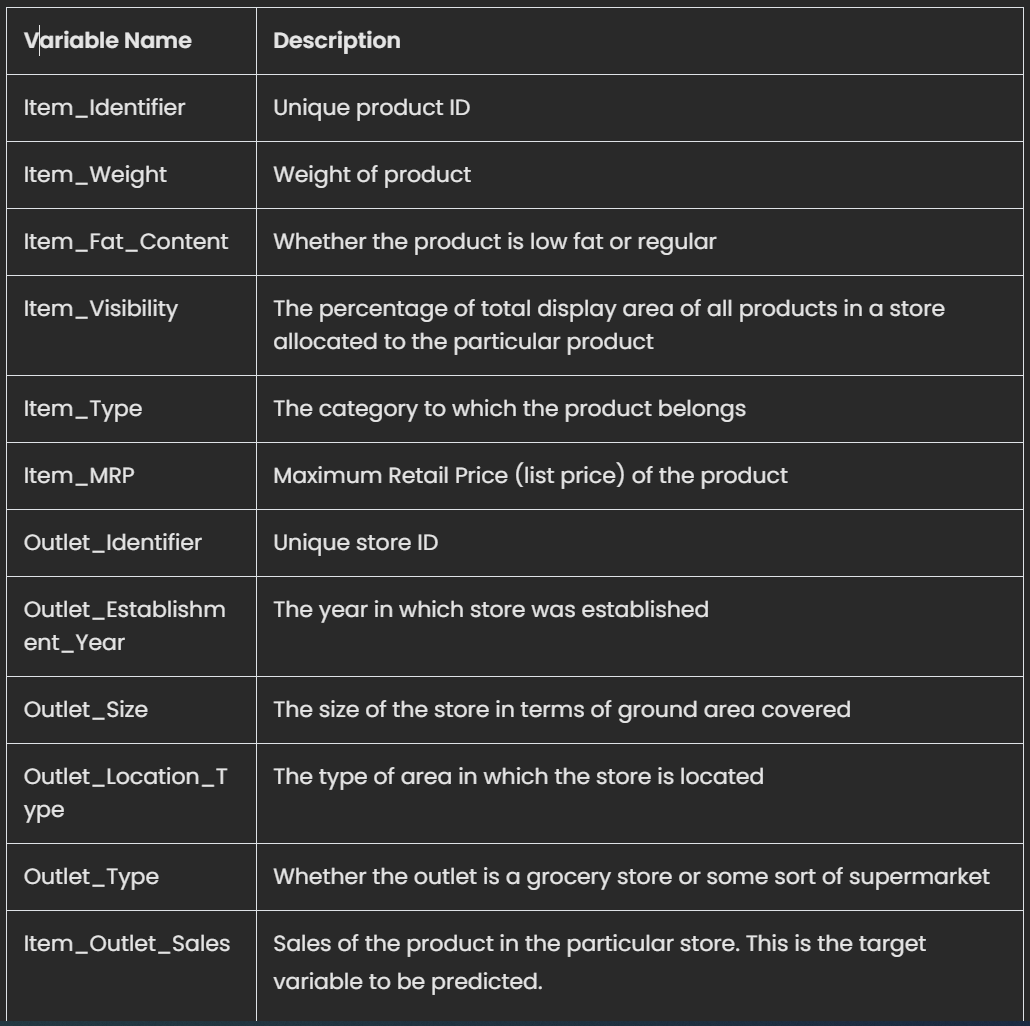

## ** Part 2: Data Cleaning**

### 1. How many rows and columns?


In [102]:
shape = df.shape

print(f"This dataframe has {shape[0]} rows and {shape[1]} columns.")

This dataframe has 8523 rows and 12 columns.


### 2. What are the dataypes of each variable?

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


From inspecting df.info():
- **Objects:** (7)
  - Item_Identifier
  - Item_Fat_Content
  - Item_Type
  - Outlet_Identifier
  - Outlet_Size
  - Outlet_Location_Type
  - Outlet_Type
- **Floats:** (4)
  - Item_Weight
  - Item_Visibility
  - Item_MRP
  - Item_Outlet_Sales
- **Integers:** (1)
  - Outlet_Estabishment_Year


### 3. Are there duplicates? If so, drop any duplicates.

In [104]:
# see how many duplicates there are 
dup = df.duplicated().sum()
print(f"There are {dup} duplicate rows in this dataframe.")

There are 0 duplicate rows in this dataframe.


### 4. Identify missing values.

In [105]:
# see how many missing values there are in each column
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice.)



- **Strategy 1: Delete rows**
  - Will NOT delete rows, because all rows have many more filled than missing values, and we want to keep that data.

- **Strategy 2: Delete columns**
  - Will NOT delete columns, because the columns missing data ('Item_Weight' and 'Outlet_Size') still have a majority of their data, and we don't want to lose that. 'Item Weight' is missing 1463/8523 (roughly 17%) of its values, and 'Outlet_Size' is missing 2410/8523 (roughly 28%) of its values.

- ** Strategy 3: Impute values**
  - WILL impute values to keep all existing data in dataframe and take best guess at missing data.
    - 'Item_Weight' 
- Will impute missing values
  - Item_Weight has numeric values, so will use mean
  - Outlet_Size has categorical values so will use most frequent (mode)

In [106]:
# address missing data in Item_Weight (numeric data) by filling in missing values with mean

# get mean of Item_Weight
mean_weight = df['Item_Weight'].mean()
mean_weight

12.857645184135976

In [107]:
# impute missing Item_Weight values with mean_weight
df['Item_Weight'].fillna(mean_weight, inplace = True)

In [108]:
# address missing data in Outlet_Size (categorical data)

# see the distribution of categories
size_value_counts = df['Outlet_Size'].value_counts()
display(size_value_counts)

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [109]:
# not ideal to use mode since number of 'Medium' and 'Small' stores are similar
# but will use mode since it will introduce the fewest numbers of errors compared to other categories

df['Outlet_Size'].fillna('Medium', inplace = True)

### 6. Confirm that there are no missing values after addressing them.

In [110]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### 7. Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent).



In [111]:
# see distribution of categories using value_counts() for all categorical data columns

categorical_columns = ['Item_Fat_Content', 
                       'Item_Type', 
                       'Outlet_Size', 
                       'Outlet_Location_Type', 
                       'Outlet_Type', 
                       'Outlet_Establishment_Year']

def get_value_counts(columns_list):
  for col in columns_list:
    print(f"Column: {col}")
    print(df[col].value_counts())
    print()
  
get_value_counts(categorical_columns)

Column: Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

Column: Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Column: Outlet_Size
Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Column: Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

Column: Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type

In [112]:
# fix Item_Fat_Content values to make consistent

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('reg', 'Regular')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('low fat', 'Low Fat')

# check results
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [113]:
# I would ask the source of the data if 'High' should be 'Large', but for now
# I will assume it should be, and replace it

df['Outlet_Size'] = df['Outlet_Size'].replace('High', 'Large')

# check results
df['Outlet_Size'].value_counts()

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

### 8. For any numerical columns, obtain the summary statistics of each (min, max, mean).



In [114]:
df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.00,8523.00,8523.00,8523.00,8523.00
mean,12.86,0.07,140.99,1997.83,2181.29
std,4.23,0.05,62.28,8.37,1706.50
min,4.56,0.00,31.29,1985.00,33.29
25%,9.31,0.03,93.83,1987.00,834.25
50%,12.86,0.05,143.01,1999.00,1794.33
75%,16.00,0.09,185.64,2004.00,3101.30
max,21.35,0.33,266.89,2009.00,13086.96


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Project 1 - Part 3 (Core)**

For Part 3, your task is to complete any statistical analyses that might help you understand, explain, or model with your data. This must include at least one of each:



- Histogram to view the distributions of various features in your dataset.
- Boxplot to view statistical summaries of various features in your dataset.
- Heatmap of the correlation between features.

In [116]:
from pandas.plotting import scatter_matrix

<Figure size 432x288 with 0 Axes>

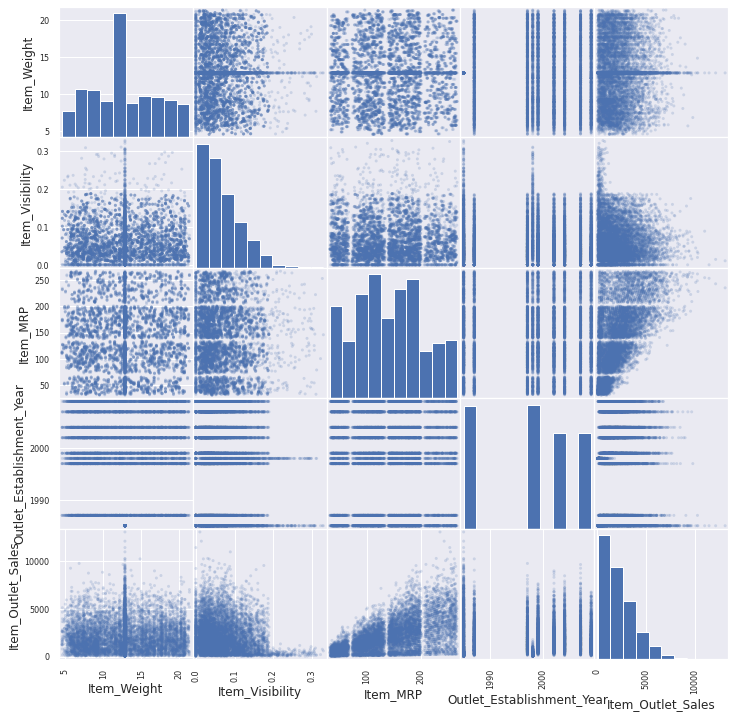

In [136]:
# explore possible scatterplots and histograms of numerical variables
plt.figure()
scatter_matrix(df, alpha = 0.2, figsize=(12, 12), diagonal = 'hist')
plt.show();

In [118]:
# follow up on:
# some degree of correlation: Item_Outlet_Sales and Item_MRP
# strange cliff: Item_Outlet_Sales and Item_Visibility

In [119]:
# explore histograms and boxplots: Item_Outlet_Sales grouped by all other variables

In [120]:
# select the categorical variable columns to draw exploratory grouped-by boxplots and histograms
cat_cols = ['Item_Fat_Content', 'Item_Type', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']
cat_cols

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

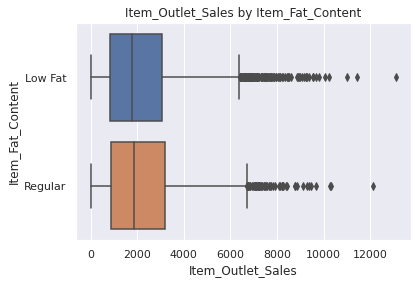

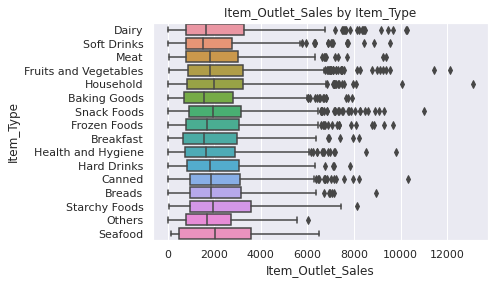

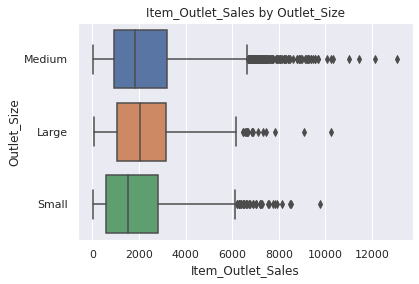

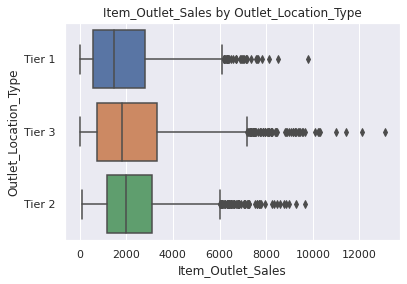

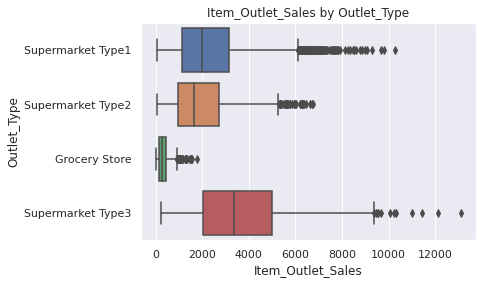

In [121]:
# create and view boxplots
for col in cat_cols:
  col_name = col
  col = sns.boxplot(x = 'Item_Outlet_Sales', y = col, data = df)
  col.set_title('Item_Outlet_Sales by ' + col_name)
  plt.show()
  

In [122]:
# create and view histograms

In [123]:
df['Item_Fat_Content'].value_counts() # Low Fat, Regular

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

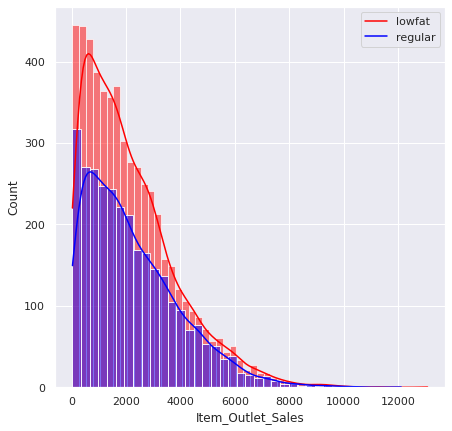

In [124]:
# Item_Outlet_Sales for "Low Fat" vs. "Regular"

lowfat_df = df[df['Item_Fat_Content'] == 'Low Fat']
regular_df = df[df['Item_Fat_Content'] == 'Regular']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(1, 1, figsize = (7, 7))
sns.histplot(x = 'Item_Outlet_Sales', data = lowfat_df, kde = True, color = 'red')
sns.histplot(x = 'Item_Outlet_Sales', data = regular_df, kde = True, color = 'blue')
plt.legend(loc = 'best', labels = ['lowfat', 'regular'])
plt.show()

In [125]:
df['Item_Type'].value_counts()
# Fruits and Vegetables
# Snack Foods
# Household
# Frozen Foods
# Dairy
# Canned
# Baking Goods
# Health and Hygiene
# Soft Drinks
# Meat
# Breads
# Hard Drinks
# Others
# Starchy Foods
# Breakfast
# Seafood

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

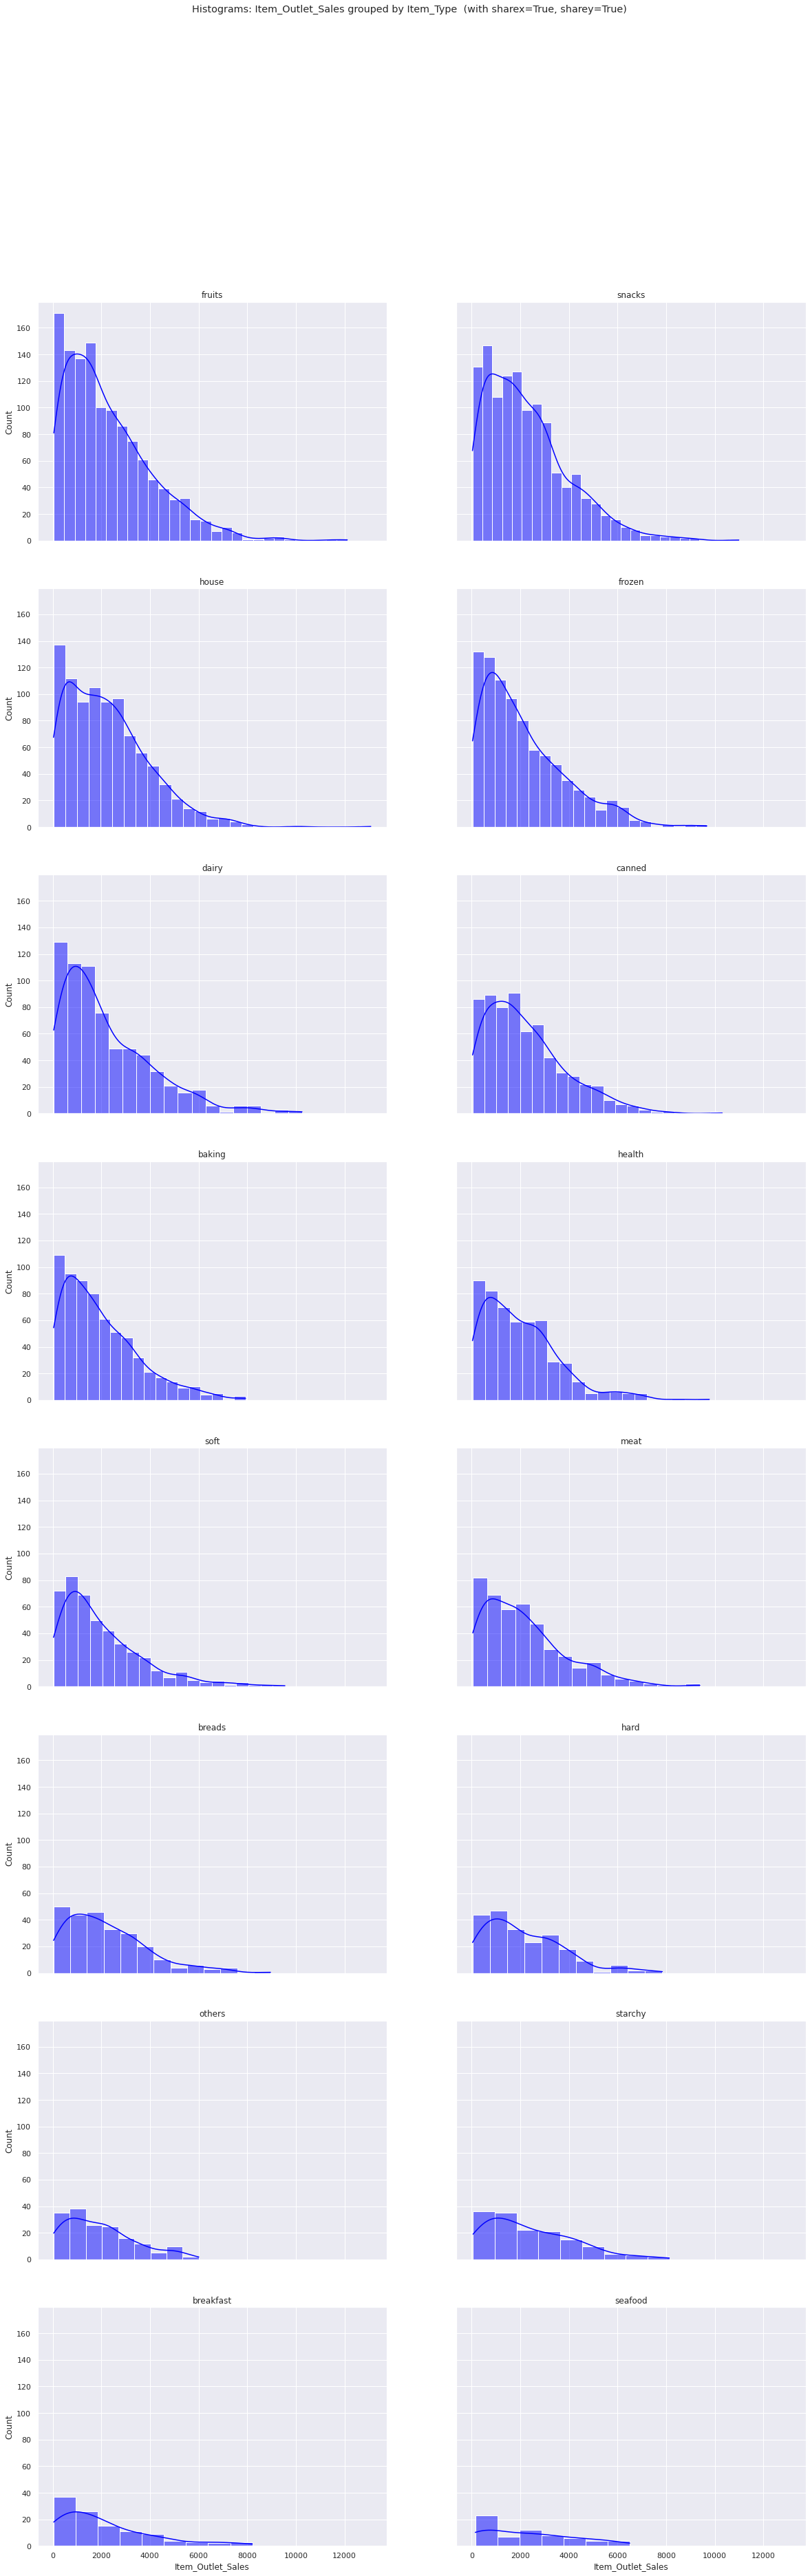

In [126]:
# Item_Outlet_Sales for each Item_Type (8 x 2)

fruits_df = df[df['Item_Type'] == 'Fruits and Vegetables']
snacks_df = df[df['Item_Type'] == 'Snack Foods']
house_df = df[df['Item_Type'] == 'Household']
frozen_df = df[df['Item_Type'] == 'Frozen Foods']
dairy_df = df[df['Item_Type'] == 'Dairy']
canned_df = df[df['Item_Type'] == 'Canned']
baking_df = df[df['Item_Type'] == 'Baking Goods']
health_df = df[df['Item_Type'] == 'Health and Hygiene']
soft_df = df[df['Item_Type'] == 'Soft Drinks']
meat_df = df[df['Item_Type'] == 'Meat']
breads_df = df[df['Item_Type'] == 'Breads']
hard_df = df[df['Item_Type'] == 'Hard Drinks']
others_df = df[df['Item_Type'] == 'Others']
starchy_df = df[df['Item_Type'] == 'Starchy Foods']
breakfast_df = df[df['Item_Type'] == 'Breakfast']
seafood_df = df[df['Item_Type'] == 'Seafood']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(nrows = 8, ncols = 2, figsize = (20,60), sharey=True, sharex=True)
sns.histplot(x = 'Item_Outlet_Sales', data = fruits_df, kde = True, color = 'blue', ax = axes[0,0]).set(title = 'fruits')
sns.histplot(x = 'Item_Outlet_Sales', data = snacks_df, kde = True, color = 'blue', ax = axes[0,1]).set(title = 'snacks')
sns.histplot(x = 'Item_Outlet_Sales', data = house_df, kde = True, color = 'blue', ax = axes[1,0]).set(title = 'house')
sns.histplot(x = 'Item_Outlet_Sales', data = frozen_df, kde = True, color = 'blue', ax = axes[1,1]).set(title = 'frozen')
sns.histplot(x = 'Item_Outlet_Sales', data = dairy_df, kde = True, color = 'blue', ax = axes[2,0]).set(title = 'dairy')
sns.histplot(x = 'Item_Outlet_Sales', data = canned_df, kde = True, color = 'blue', ax = axes[2,1]).set(title = 'canned')
sns.histplot(x = 'Item_Outlet_Sales', data = baking_df, kde = True, color = 'blue', ax = axes[3,0]).set(title = 'baking')
sns.histplot(x = 'Item_Outlet_Sales', data = health_df, kde = True, color = 'blue', ax = axes[3,1]).set(title = 'health')
sns.histplot(x = 'Item_Outlet_Sales', data = soft_df, kde = True, color = 'blue', ax = axes[4,0]).set(title = 'soft')
sns.histplot(x = 'Item_Outlet_Sales', data = meat_df, kde = True, color = 'blue', ax = axes[4,1]).set(title = 'meat')
sns.histplot(x = 'Item_Outlet_Sales', data = breads_df, kde = True, color = 'blue', ax = axes[5,0]).set(title = 'breads')
sns.histplot(x = 'Item_Outlet_Sales', data = hard_df, kde = True, color = 'blue', ax = axes[5,1]).set(title = 'hard')
sns.histplot(x = 'Item_Outlet_Sales', data = others_df, kde = True, color = 'blue', ax = axes[6,0]).set(title = 'others')
sns.histplot(x = 'Item_Outlet_Sales', data = starchy_df, kde = True, color = 'blue', ax = axes[6,1]).set(title = 'starchy')
sns.histplot(x = 'Item_Outlet_Sales', data = breakfast_df, kde = True, color = 'blue', ax = axes[7,0]).set(title = 'breakfast')
sns.histplot(x = 'Item_Outlet_Sales', data = seafood_df, kde = True, color = 'blue', ax = axes[7,1]).set(title = 'seafood')
fig.suptitle("Histograms: Item_Outlet_Sales grouped by Item_Type  (with sharex=True, sharey=True)")
plt.show()

In [127]:
df['Outlet_Size'].value_counts() # Medium, Small, Large

Medium    5203
Small     2388
Large      932
Name: Outlet_Size, dtype: int64

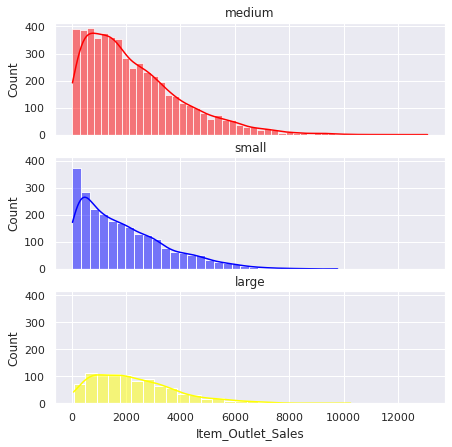

In [128]:
# Item_Outlet_Sales for "Medium" vs. "Small" vs. "Large" Outlet_Size

medium_df = df[df['Outlet_Size'] == 'Medium']
small_df = df[df['Outlet_Size'] == 'Small']
large_df = df[df['Outlet_Size'] == 'Large']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(nrows = 3, figsize = (7, 7), sharey=True, sharex=True)
sns.histplot(x = 'Item_Outlet_Sales', data = medium_df, kde = True, color = 'red', ax = axes[0]).set(title = 'medium')
sns.histplot(x = 'Item_Outlet_Sales', data = small_df, kde = True, color = 'blue', ax = axes[1]).set(title = 'small')
sns.histplot(x = 'Item_Outlet_Sales', data = large_df, kde = True, color = 'yellow', ax = axes[2]).set(title = 'large')
plt.show()

In [129]:
df['Outlet_Location_Type'].value_counts() # Tier 1, Tier 2, Tier 3

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

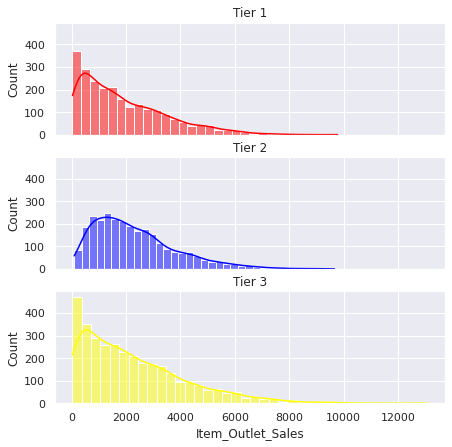

In [130]:
# Item_Outlet_Sales for "Tier 1" vs. "Tier 2" vs. "Tier 3" Outlet_Location_Type

tier1_df = df[df['Outlet_Location_Type'] == 'Tier 1']
tier2_df = df[df['Outlet_Location_Type'] == 'Tier 2']
tier3_df = df[df['Outlet_Location_Type'] == 'Tier 3']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(nrows = 3, figsize = (7, 7), sharey=True, sharex=True)
sns.histplot(x = 'Item_Outlet_Sales', data = tier1_df, kde = True, color = 'red', ax = axes[0]).set(title = 'Tier 1')
sns.histplot(x = 'Item_Outlet_Sales', data = tier2_df, kde = True, color = 'blue', ax = axes[1]).set(title = 'Tier 2')
sns.histplot(x = 'Item_Outlet_Sales', data = tier3_df, kde = True, color = 'yellow', ax = axes[2]).set(title = 'Tier 3')
plt.show()

In [131]:
df['Outlet_Type'].value_counts() # Grocery Store, Supermarket Type1,
# Supermarket Type2, Supermarket Type3

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

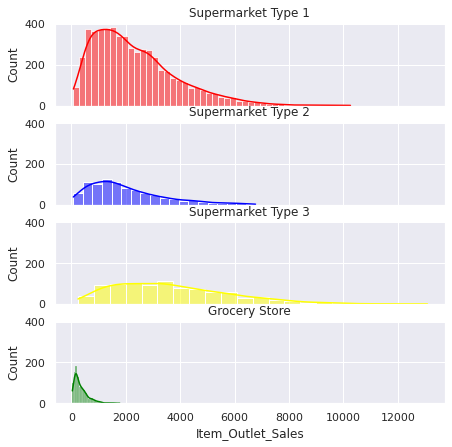

In [132]:
# Item_Outlet_Sales for "Supermarket Type1" vs. "Supermarket Type2" vs. "Supermarket Type3" vs. Grocery Store Outlet_Type

super1_df = df[df['Outlet_Type'] == 'Supermarket Type1']
super2_df = df[df['Outlet_Type'] == 'Supermarket Type2']
super3_df = df[df['Outlet_Type'] == 'Supermarket Type3']
grocery_df = df[df['Outlet_Type'] == 'Grocery Store']

sns.set(style = 'darkgrid')
fig, axes = plt.subplots(nrows = 4, figsize = (7, 7), sharey=True, sharex=True)
sns.histplot(x = 'Item_Outlet_Sales', data = super1_df, kde = True, color = 'red', ax = axes[0]).set(title = 'Supermarket Type 1')
sns.histplot(x = 'Item_Outlet_Sales', data = super2_df, kde = True, color = 'blue', ax = axes[1]).set(title = 'Supermarket Type 2')
sns.histplot(x = 'Item_Outlet_Sales', data = super3_df, kde = True, color = 'yellow', ax = axes[2]).set(title = 'Supermarket Type 3')
sns.histplot(x = 'Item_Outlet_Sales', data = grocery_df, kde = True, color = 'green', ax = axes[3]).set(title = 'Grocery Store')
plt.show()

In [133]:
# More potential groupings if needed: Item_Outlet_Sales grouped by (Outlet_Type OR Outlet_Location_Type) AND Item_MRP

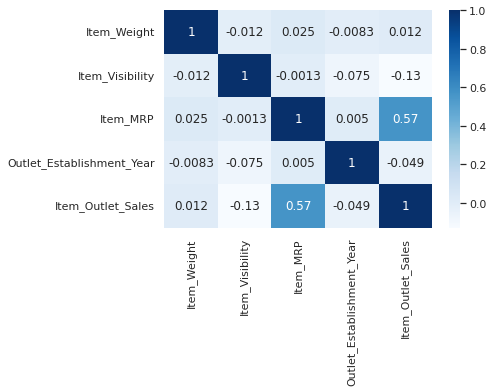

In [134]:
# explore heatmap of correlation between features

corr = df.corr()
sns.heatmap(corr, cmap = 'Blues', annot = True);

In [135]:
# modterate degree of correlation: Item_MRP and Item_Outlet_Sales